# Bike-sharing system assignment

## Step 1: Reading and Understanding the Data


###### Let us first import NumPy and Pandas and read the housing dataset

In [140]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [141]:
#Importing the data and check the first five rows
bike_df=pd.read_csv("day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [142]:
#Check the shape of the dataframe
bike_df.shape

(730, 16)

In [143]:
#Checking for count and the type of data present in the given dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


insight: no null value found in any column

In [144]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000




All the features seem to be on varying scales, moving forward we will try to scale them.

## 2) Data preparation

 Dropping the columns  'casual' and 'registered' because the 'cnt' variable indicates the total number of bike rentals, including both casual and registered and it is our target variable.

 Dropping instant as it a record index and not useful for analysis

In [145]:
bike_df.drop(columns=['instant','casual','registered'],inplace=True)

In [146]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [147]:
#Converting the dteday column to a datetime object and extracting the day of the month from it


bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df['day'] = bike_df['dteday'].dt.day


In [148]:
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


In [149]:
#dropping dteday because we have  similar column available like yr,mnth,day 
bike_df.drop(['dteday'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


In [150]:
# Checking null values
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64

Converting few columns to categorical columns for better interpretation of the dataset

In [151]:
# Season column conversion to categorical.
bike_df.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [152]:
# weathersit column conversion to categorical
bike_df.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace=True)

In [153]:
#month column conversion to categorical

bike_df.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)

In [154]:
# weekday column conversion to categorical

bike_df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'},inplace=True)

In [155]:
bike_df.weekday.replace({0:'2018',1:'2019'},inplace=True)

In [156]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
3,Spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


In [157]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  day         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


 Purpose of conversion is because higher numbers will be given more priority, we are making all rows at same level

## Step 3: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

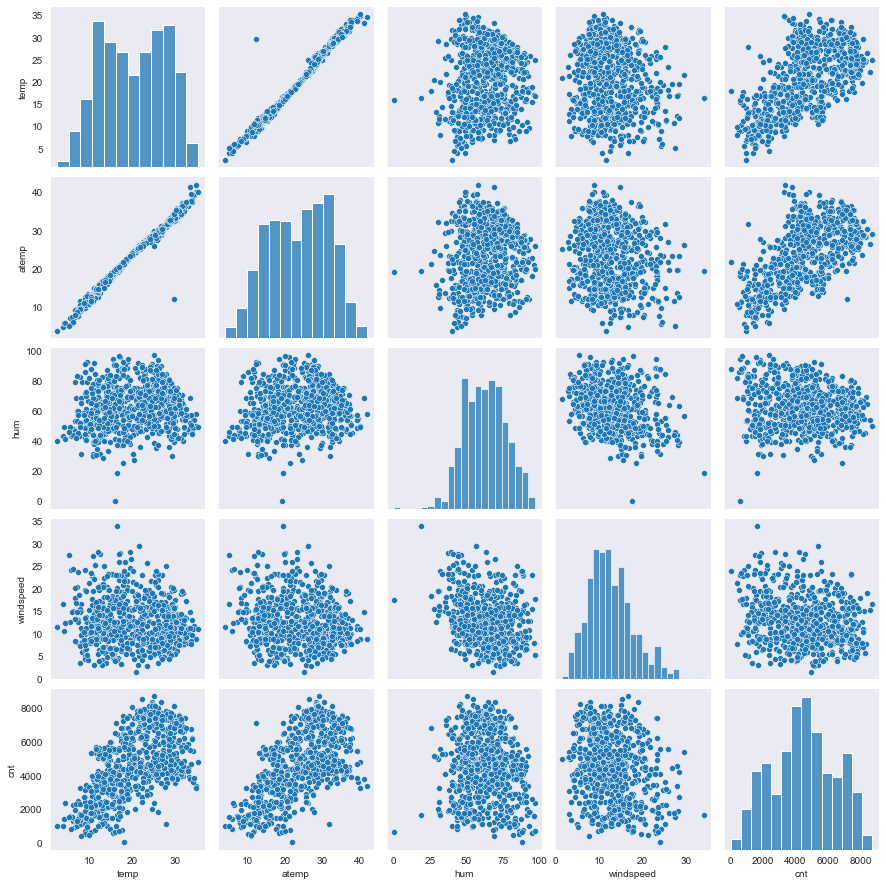

In [158]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=bike_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

 Insight: there is a linear relationship between the target varible cnt and some independent variables

 So from the above plots we can clearly understand that temp and atemp are having high correlation

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

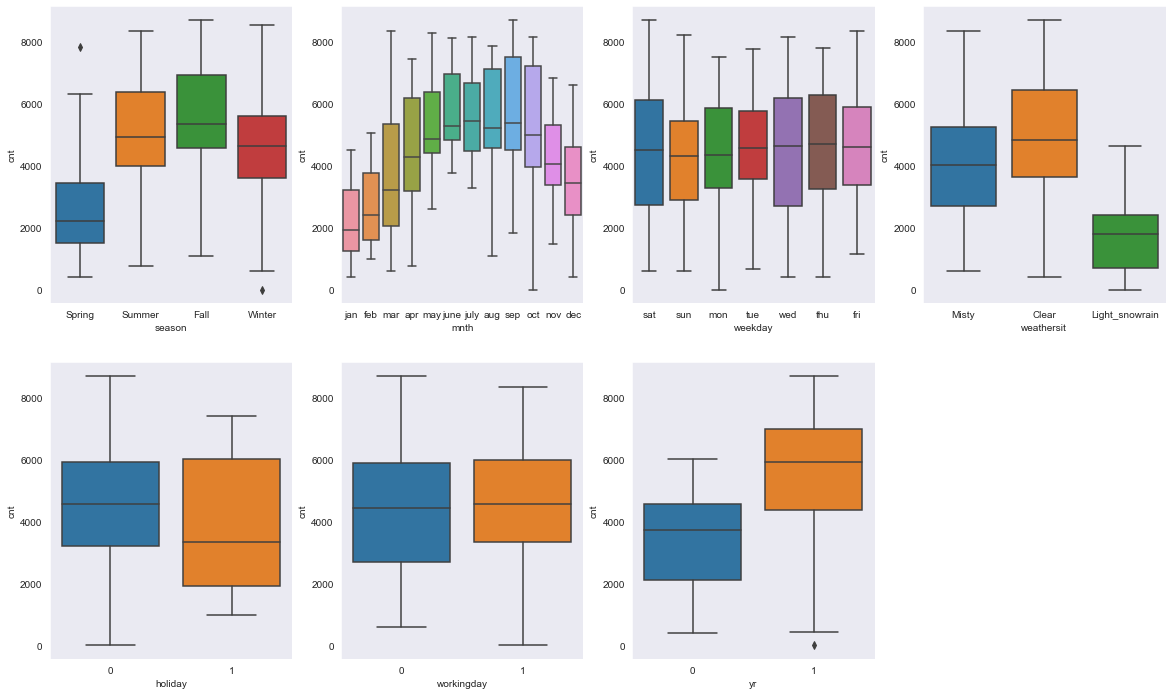

In [159]:

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data =bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

### EDA on the dataset
To understand the trends and insights of the data affecting the cnt

In [160]:
#categorical column visualiztaion
def plot_categorical(i):
    sns.barplot(i,'cnt',data=bike_df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    # Adding and formatting title
    plt.title("Countplot for "+i , fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()
   
   

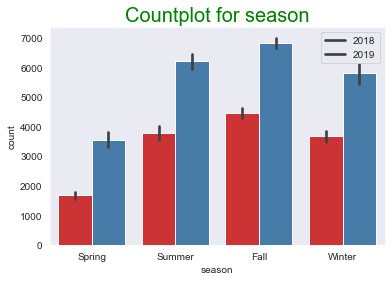

In [161]:
 # plotting visualization for season column

plot_categorical('season')

 The bookings have increased from 2018 to 2019 and fall season has the most number of bookings

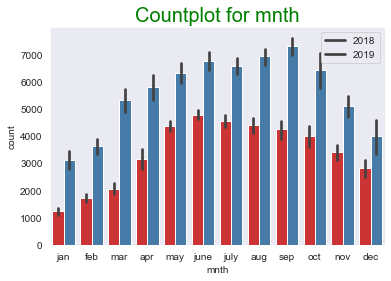

In [162]:
# plotting visualization for month column

plot_categorical('mnth')

 The trend seems to be such that the bookings have increased and peaked in the middle of the year, while in the beginning of the year and the end of the year there are lesser number of bookings.
May to sept has an overall high number of bookings

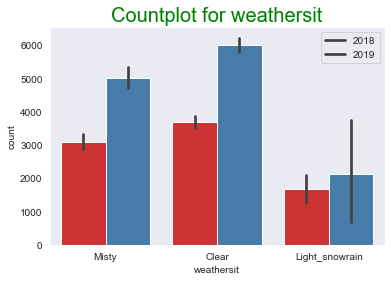

In [163]:
# plotting visualization for weathersit column

plot_categorical('weathersit')

 Clear weathersit has maximum number of bookings. The bookings have increased from 2018-2019

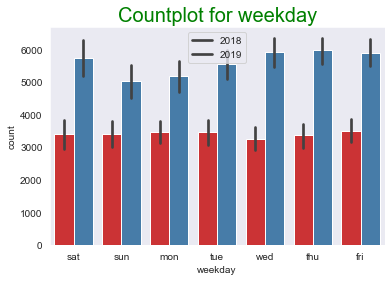

In [164]:
# plotting visualization for weekday column

plot_categorical('weekday')

 sunday, monday,tuesday have lesser number of bookings

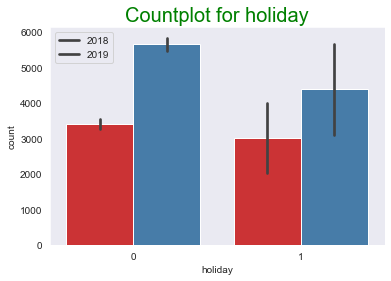

In [165]:
# plotting visualization for holiday column

plot_categorical('holiday')

 non-holiday seems to to have more bookings, since people might go on trip and not be in town or just stay at home

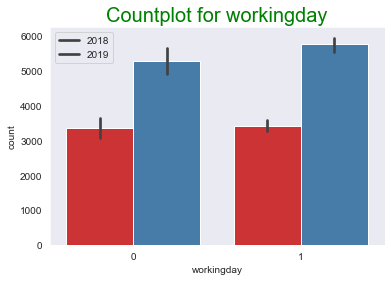

In [166]:
# plotting visualization for workingday column

plot_categorical('workingday')


equal distribution between working day and non-working day

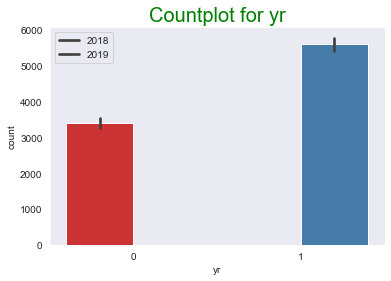

In [167]:
# plotting visualization for year column

plot_categorical('yr')

 The business seems to be growing and gaining popularity from 2018-2019

In [168]:
#writing a function for plotting numeric variables
def plot_numerical(i):
    sns.set_style("dark")
    sns.displot( data=bike_df,x=i,color="g",bins=20)
    plt.title("Distribution of "+i, fontsize=12)
    plt.xlabel(i, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

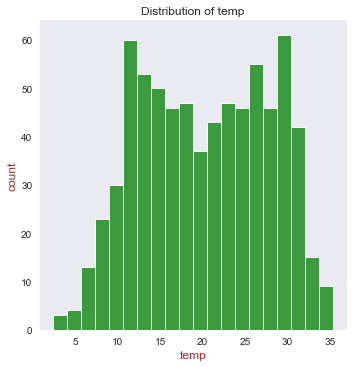

In [169]:
plot_numerical('temp')

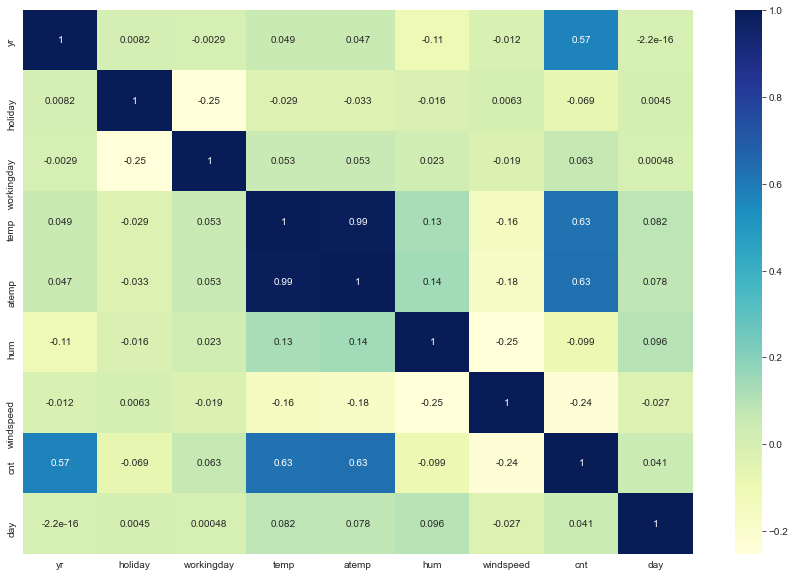

In [170]:
#Heatmap for correlation between numeric variables
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

# Data preparation for modelling

In [171]:
#one hot encoding for categorical variables month, weekday, weathersit and season variables.

month=pd.get_dummies(bike_df.mnth,drop_first=True)
weekday=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit=pd.get_dummies(bike_df.weathersit,drop_first=True)
season=pd.get_dummies(bike_df.season,drop_first=True)

In [172]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
3,Spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


In [173]:
# Add the results to the original housing dataframe

bike_df = pd.concat([bike_df, month,weekday,weathersit,season], axis = 1)

In [174]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,Spring,Summer,Winter
0,Spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [175]:
# Drop columns as we have created the dummies for it

bike_df.drop(['mnth','season','weekday','weathersit'], axis = 1, inplace = True)

In [176]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,aug,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,1,0,0


In [177]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may',
       'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [178]:
bike_df.drop(columns=['atemp'],inplace=True)

# Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [179]:
bike_df.shape

(730, 30)

In [180]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [181]:
# Checking shape and size for train and test
print(df_train.shape)


(510, 30)


In [182]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'day',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain',
       'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [183]:
print(df_test.shape)


(219, 30)


In [184]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'day',
       'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain',
       'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

#### Rescaling the Features

In [185]:
scaler = MinMaxScaler()

In [186]:
# Let us scale continuous variables
num_vars = ['temp', 'hum', 'windspeed','cnt']
#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [187]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,15.650980,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,8.842418,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,16.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,23.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [188]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,day,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,Spring,Summer,Winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,16,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,31,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,3,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,30,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,28,0,0,...,1,0,0,0,0,0,1,0,1,0


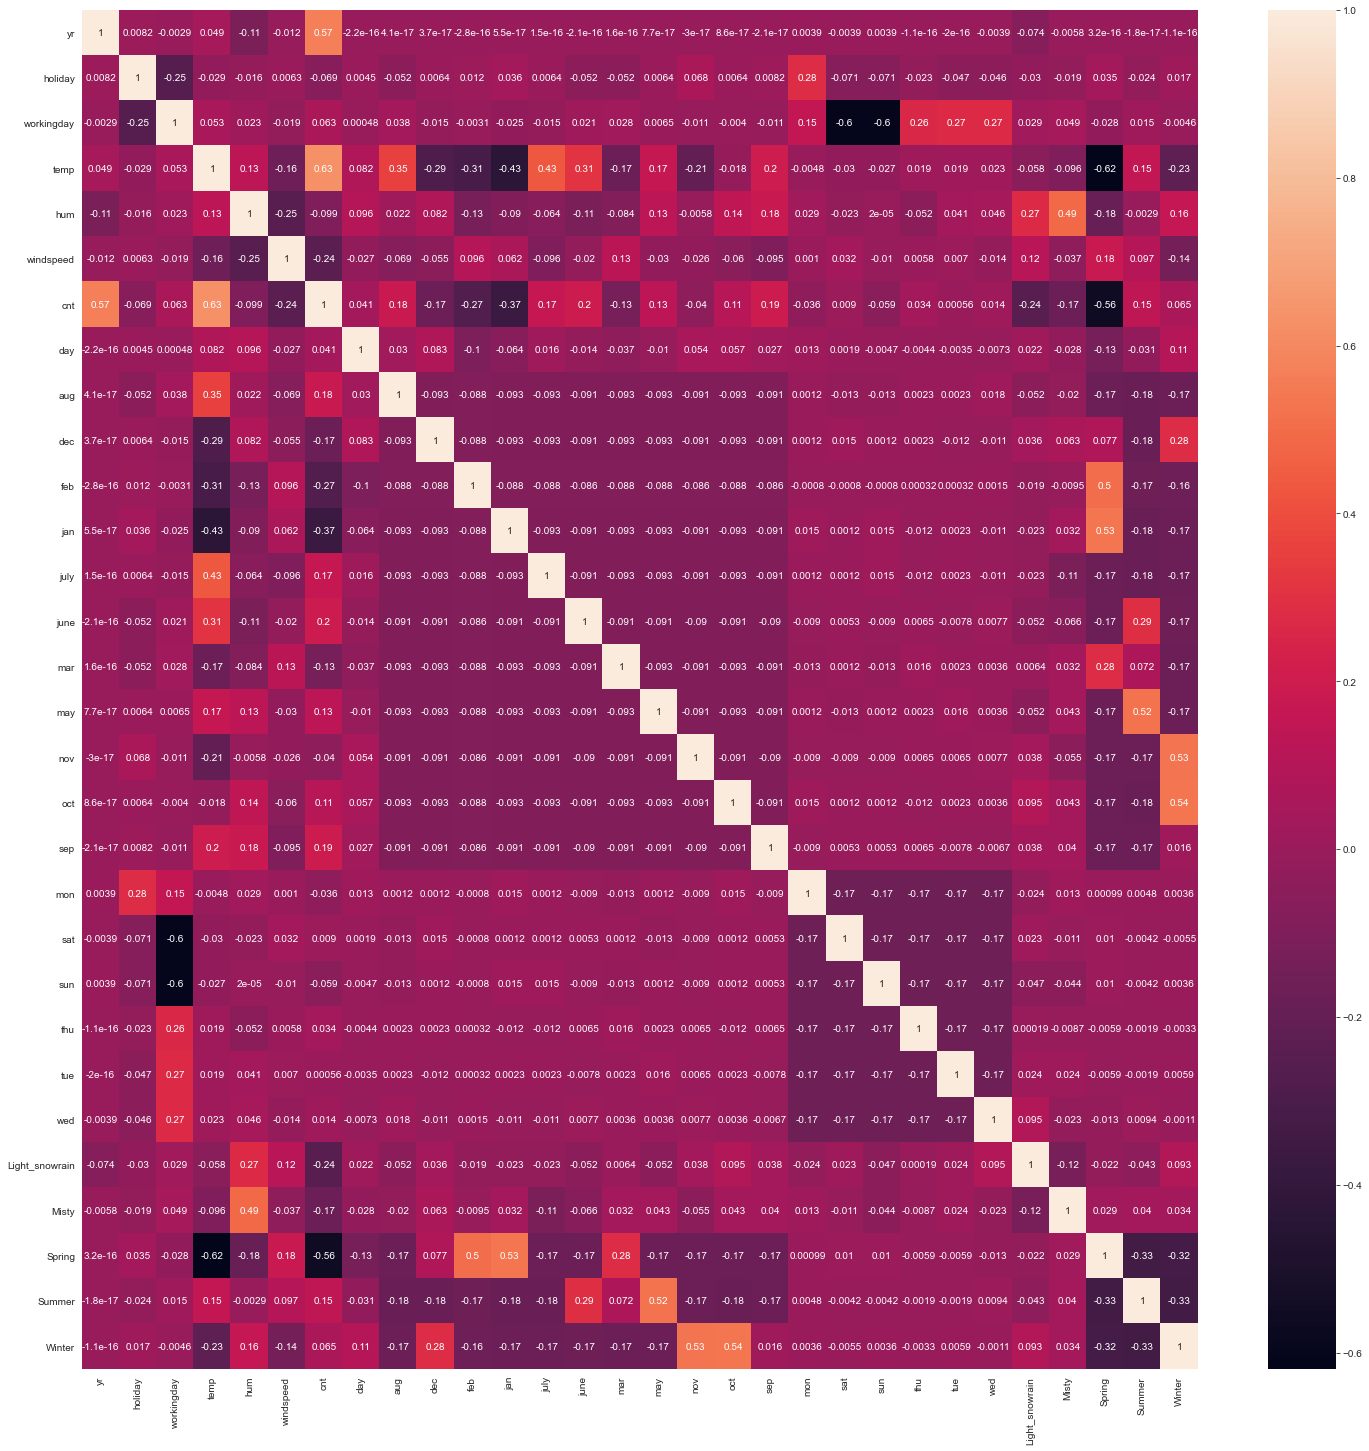

In [189]:
#Calculating Correlation
bike_corr = bike_df.corr()
plt.figure(figsize=(25,25))

#Drawing Heatmap of correlation
sns.heatmap(bike_corr,annot=True, )
plt.show()


cnt has higher correlation with year, temp and atemp. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.Similarly, Misty and humidity show correlation.  

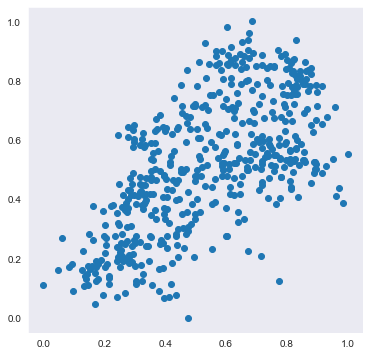

In [190]:
# Visualizing one of the correlation to verify one assumption of linear regression via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

# Model Building

In [191]:
y_train = df_train.pop('cnt')
X_train = df_train

In [192]:
#Initialize Linear Regression Model and perform Recursive Feature Elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [193]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 15),
 ('aug', False, 9),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thu', False, 11),
 ('tue', False, 8),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [194]:
#Print Columns selected by RFE. No we can manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [195]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['day', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [196]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'Spring', 'Summer',
       'Winter']]

In [197]:
columns=X_train_rfe.columns

In [198]:
#generic function for vif
def get_vif(column):
    df1 = X_train_rfe[columns]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))
    vif

In [199]:
#generic function for model building using stats api
def model_build(column):
    X_train_sm = sm.add_constant(X_train_rfe[columns])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm


### Model building 1

In [200]:
#Building first linear regression model
model_build(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          2.31e-191
Time:                        01:24:50   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

In [201]:
# dropping variable "hum" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [202]:
columns=X_train_rfe.columns

### Model Building 2

In [203]:
#Building second linear regression model
model_build(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          7.33e-189
Time:                        01:24:50   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [204]:
# dropping variable "jan" due to its p value 0.027 and re-process the model
X_train_rfe=X_train_rfe.drop(['jan'],axis=1)

In [205]:
columns=X_train_rfe.columns

## Model Building 3

In [206]:
#Building third linear regression model
model_build(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          5.73e-189
Time:                        01:24:50   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1577      0.031      5.

In [207]:
# dropping variable "holiday" due to its p value 0.038 and re-process the model
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [208]:
columns=X_train_rfe.columns

## Model building 4

In [209]:
#Building fourth linear regression model
model_build(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          3.28e-189
Time:                        01:24:51   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.031      4.

In [210]:
# dropping variable "july" due to its p value 0.008 and re-process the model
X_train_rfe=X_train_rfe.drop(['july'],axis=1)

In [211]:
columns=X_train_rfe.columns

In [212]:
#Building fifth linear regression model
model_build(columns)
get_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          6.86e-189
Time:                        01:24:54   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1405      0.031      4.

In [213]:
# dropping variable "spring" due to its p value 0.002 and re-process the model
X_train_rfe=X_train_rfe.drop(['Spring'],axis=1)

In [214]:
columns=X_train_rfe.columns
final_columns=columns
print(final_columns)

Index(['yr', 'workingday', 'temp', 'windspeed', 'sep', 'sat', 'Light_snowrain',
       'Misty', 'Summer', 'Winter'],
      dtype='object')


In [216]:
#Building 6th linear regression model
X_train_sm = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train, X_train_sm).fit()
print(lm_6.summary())

get_vif(final_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):          1.47e-188
Time:                        01:24:58   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0753      0.019      4.

 We can cosider the above model i.e 6th, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 254 (which is greater than 1) and the p-value of 1.47e-188 i.e almost equals to zero, states that the overall model is significant

## Step 6: Residual Analysis of the train data and validation 

In [217]:
 X_train_rfe.head()

,yr,workingday,temp,windspeed,sep,sat,Light_snowrain,Misty,Summer,Winter
653,1,1,0.509887,0.300794,0,0,0,0,0,1
576,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,1,0,1,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,1,1,0


In [218]:
y_train_pred = lm_6.predict(X_train_sm)

In [250]:
# Find out the R squared value between train and predicted train data sets.  
r2_train=r2_score(y_train,y_train_pred)
print(r2_train)

0.8357769866151917


### Normality of error terms

Text(0.5, 0, 'Errors')

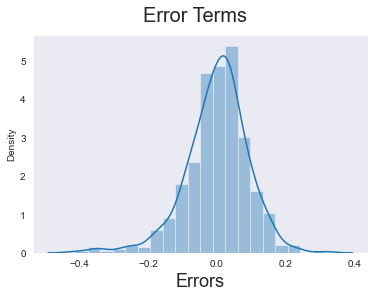

In [220]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

### Error terms are following normal distribution with mean =0

#### Verifying Multicolinearity

In [221]:
get_vif(X_train_rfe)

         Features   VIF
2            temp  4.76
1      workingday  4.04
3       windspeed  3.43
0              yr  2.02
5             sat  1.69
8          Summer  1.57
7           Misty  1.53
9          Winter  1.40
4             sep  1.20
6  Light_snowrain  1.08


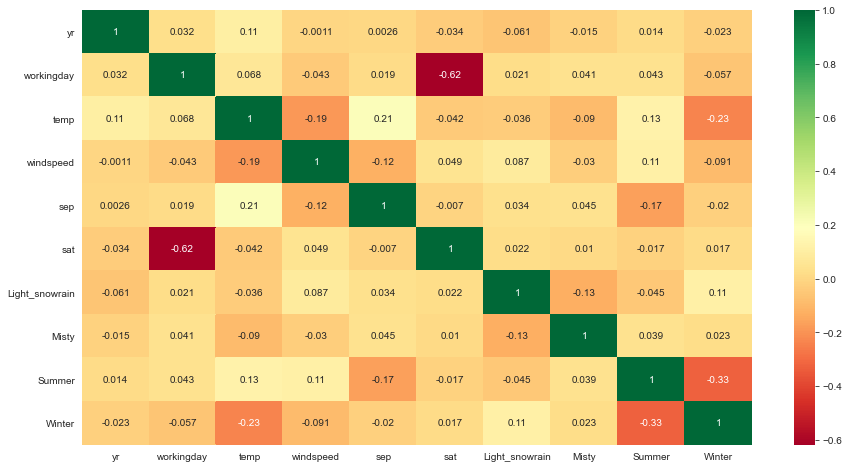

In [222]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

##### VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap

#### Homoscedasticity

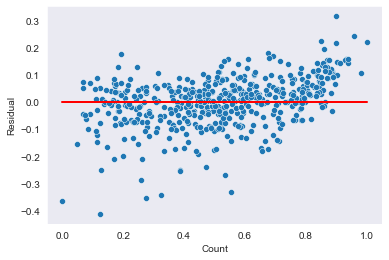

In [223]:
y_train_pred = lm_6.predict(X_train_sm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


#### No visible pattern observed from above plot for residuals.

In [224]:

from statsmodels.stats.stattools import durbin_watson
  

# Using statsmodels.durbin_watson() method
value = durbin_watson(residual)
  
print(value)

2.0800281823521516


### Independence of residuals
Durbin-Watson value of final model lr_6 is 2.0800, which signifies there is no autocorrelation.

## Step 7: Making Predictions Using the Final Model

In [225]:
# Let us scale continuous variables
#Scale variables in X_test
num_vars = ['temp', 'hum', 'windspeed','cnt']

#Test data to be transformed only, no fitting
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test


In [242]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'sep', 'sat', 'Light_snowrain',
       'Misty', 'Summer', 'Winter']

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(219, 11)

In [243]:

#Predicting test data values
#y_test_pred = lm_6.predict(X_test_sm[cols])
y_test_pred = lm_6.predict(X_test_sm)

In [247]:
# Find out the R squared value between test and predicted test data sets.  
r2=r2_score(y_test,y_test_pred)
print(r2)

0.7955844377237249


 R2 score has negligible difference, so we can infer this is the good to go model

## Model evaluation

Text(0, 0.5, 'y_pred')

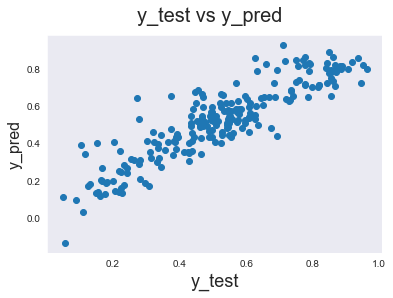

In [245]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [252]:
# Calculating Adjusted-R^2 value for the train dataset

adjusted_r2 = round(1-(1-r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adjusted_r2)

0.7847


In [251]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_train)*(X_train_sm.shape[0]-1)/(X_train_sm.shape[0]-X_train_sm.shape[1]-1),4)
print(adjusted_r2)

0.8321


 Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.7955
- Train dataset Adjusted R^2 : 0.8321    
- Test dataset Adjusted R^2  : 0.7847

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.

 The final model is built with 10 significant features selected from an initial list of 30 features,
shortlisted using RFE(15 Features) and Manual Feature selection techniques using p-values and VIF.